## Analysis of duration data

### Import and load data

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
from statistics import mean

In [2]:
iterations = 125
n_trucks = 250
scenarios = range(9)

results = pickle.load(open("../data/results.pickle", "rb"))
print(type(results))

<class 'dict'>


### Analysis

In [3]:
averages = {}
for s in scenarios:
    averages[s] = []
    for i in range(iterations):
        averages[s].append(statistics.mean(results[s][i]))

In [4]:
for s in scenarios:
    print(f"Scenario {s} average: {statistics.mean(averages[s]):.3f}")

Scenario 0 average: 0.000
Scenario 1 average: 30.476
Scenario 2 average: 70.628
Scenario 3 average: 298.484
Scenario 4 average: 596.928
Scenario 5 average: 746.182
Scenario 6 average: 1458.101
Scenario 7 average: 1827.822
Scenario 8 average: 3624.465


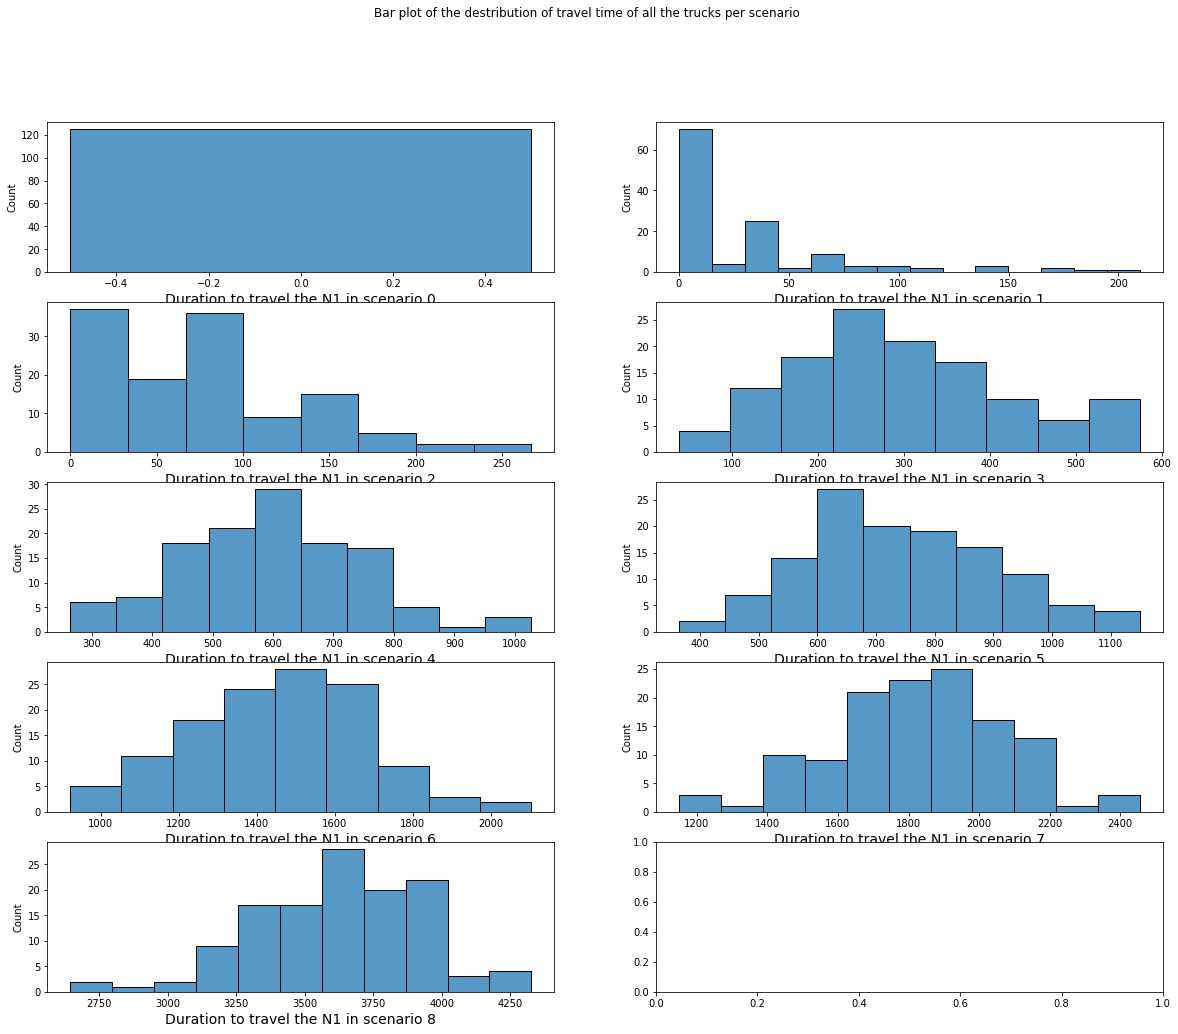

<Figure size 432x288 with 0 Axes>

In [5]:
# visualisation of the deviation of the time taken (in minutes) for each scenario
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 16))
fig.suptitle('Bar plot of the destribution of travel time of all the trucks per scenario')

sns.histplot(ax=axs[0,0], data=averages[0])
axs[0,0].set_xlabel('Duration to travel the N1 in scenario 0', fontsize=14)

sns.histplot(ax=axs[0,1], data=averages[1])
axs[0,1].set_xlabel('Duration to travel the N1 in scenario 1', fontsize=14)

sns.histplot(ax=axs[1,0], data=averages[2])
axs[1,0].set_xlabel('Duration to travel the N1 in scenario 2', fontsize=14)

sns.histplot(ax=axs[1,1], data=averages[3])
axs[1,1].set_xlabel('Duration to travel the N1 in scenario 3', fontsize=14)

sns.histplot(ax=axs[2,0], data=averages[4])
axs[2,0].set_xlabel('Duration to travel the N1 in scenario 4', fontsize=14)

sns.histplot(ax=axs[2,1], data=averages[5])
axs[2,1].set_xlabel('Duration to travel the N1 in scenario 5', fontsize=14)

sns.histplot(ax=axs[3,0], data=averages[6])
axs[3,0].set_xlabel('Duration to travel the N1 in scenario 6', fontsize=14)

sns.histplot(ax=axs[3,1], data=averages[7])
axs[3,1].set_xlabel('Duration to travel the N1 in scenario 7', fontsize=14)

sns.histplot(ax=axs[4,0], data=averages[8])
axs[4,0].set_xlabel('Duration to travel the N1 in scenario 8', fontsize=14)
plt.show()

plt.savefig('histogram_scenario.png')

In [6]:
#calculating the average travel time
for i in range(9):
    x = mean(averages[i])
    print(f'The average time a truck in scenario {i} to travel the N1 is {x:.2f} minutes')

The average time a truck in scenario 0 to travel the N1 is 0.00 minutes
The average time a truck in scenario 1 to travel the N1 is 30.48 minutes
The average time a truck in scenario 2 to travel the N1 is 70.63 minutes
The average time a truck in scenario 3 to travel the N1 is 298.48 minutes
The average time a truck in scenario 4 to travel the N1 is 596.93 minutes
The average time a truck in scenario 5 to travel the N1 is 746.18 minutes
The average time a truck in scenario 6 to travel the N1 is 1458.10 minutes
The average time a truck in scenario 7 to travel the N1 is 1827.82 minutes
The average time a truck in scenario 8 to travel the N1 is 3624.46 minutes


In [7]:
#calculating the avegrage economic los
s0 = mean(averages[0])
for i in range(1, 9):
    x = (mean(averages[i]) - s0) * 2.5 /60 /24
    print(f'The average economic loss in scenario {i} is {x:.2f} % of the value of the cargo of the truck')

The average economic loss in scenario 1 is 0.05 % of the value of the cargo of the truck
The average economic loss in scenario 2 is 0.12 % of the value of the cargo of the truck
The average economic loss in scenario 3 is 0.52 % of the value of the cargo of the truck
The average economic loss in scenario 4 is 1.04 % of the value of the cargo of the truck
The average economic loss in scenario 5 is 1.30 % of the value of the cargo of the truck
The average economic loss in scenario 6 is 2.53 % of the value of the cargo of the truck
The average economic loss in scenario 7 is 3.17 % of the value of the cargo of the truck
The average economic loss in scenario 8 is 6.29 % of the value of the cargo of the truck


In [8]:
#calculating average delay
for i in range(1, 9):
    x = (mean(averages[i]) - s0)
    print(round(x, 2))


30.48
70.63
298.48
596.93
746.18
1458.1
1827.82
3624.46


In [9]:
#calculating 95% confidence intervals of the economic losses
import scipy.stats as st
confidence = 0.95
std0 = np.std(averages[0])

average = {}
low_bound = {}
high_bound = {}
interval_range = {}
economic_interval = {}

for i in range(1,9):
    average[i] = mean(averages[i])
    low_bound[i], high_bound[i] = st.norm.interval(alpha=confidence, loc=average[i], scale=st.sem(averages[i]))
    interval_range[i] = high_bound[i] - low_bound[i]

    economic_interval[i] = interval_range[i] / average[i] * 100

    print(f'Average (95% confidence interval) scenario {i}: {average[i]:.3f} ({low_bound[i]:.3f}, {high_bound[i]:.3f}), economic interval: {economic_interval[i]:.3f}%')

df = pd.DataFrame({
    "Average (min)": average,
    "Low bound (min)": low_bound,
    "High bound (min)": high_bound,
    "Interval range (min)": interval_range,
    "Economic interval (%)": economic_interval})
df.to_csv("../results/times_minimal.csv", index_label="Scenario")
df

Average (95% confidence interval) scenario 1: 30.476 (22.723, 38.229), economic interval: 50.881%
Average (95% confidence interval) scenario 2: 70.628 (60.163, 81.093), economic interval: 29.635%
Average (95% confidence interval) scenario 3: 298.484 (277.062, 319.907), economic interval: 14.354%
Average (95% confidence interval) scenario 4: 596.928 (570.593, 623.264), economic interval: 8.824%
Average (95% confidence interval) scenario 5: 746.182 (717.412, 774.952), economic interval: 7.711%
Average (95% confidence interval) scenario 6: 1458.101 (1418.105, 1498.097), economic interval: 5.486%
Average (95% confidence interval) scenario 7: 1827.822 (1783.326, 1872.319), economic interval: 4.869%
Average (95% confidence interval) scenario 8: 3624.465 (3571.537, 3677.392), economic interval: 2.921%


,Average (min),Low bound (min),High bound (min),Interval range (min),Economic interval (%)
1,30.475798,22.722643,38.228954,15.506311,50.880739
2,70.627990,60.162802,81.093178,20.930376,29.634676
3,298.484350,277.061685,319.907015,42.845330,14.354297
4,596.928220,570.592599,623.263841,52.671242,8.823715
5,746.181757,717.411775,774.951740,57.539964,7.711253
6,1458.101002,1418.105315,1498.096690,79.991375,5.485997
7,1827.822389,1783.326064,1872.318715,88.992651,4.868780
8,3624.464523,3571.536724,3677.392322,105.855598,2.920586
